In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# PRE-PROCESSING

In [2]:
data=pd.read_excel('dataset.xlsx')

In [3]:
df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Création des sous-ensembles (suite au EDA)

In [4]:
missing_rate = df.isna().sum()/df.shape[0]

In [5]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [6]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [7]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Nettoyage - Encodage

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trainset , testset = train_test_split(df , test_size=0.2, random_state=0)

In [10]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [11]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [12]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)
        
    return df

In [13]:
def imputation(df):
    return df.dropna(axis=0)

In [14]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [15]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [16]:
X_train , y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [17]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


## Modellisation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [19]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=16),
                      RandomForestClassifier(random_state=0))

## Procédure d'évaluation

In [35]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    ypred_train=model.predict(X_train)
    
    print("train - confusion_matrix:")
    print(confusion_matrix(y_train,ypred_train))
    print("test- confusion_matrix:")
    print(confusion_matrix(y_test,ypred))
    
    
    print(classification_report(y_test,ypred))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=6, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    N_recall, train_score_recall, val_score_recall = learning_curve(model, X_train, y_train,
                                              cv=6, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    f1_train=train_score.mean(axis=1)
    print("f1_train:",f1_train[-1])
    f1_val=val_score.mean(axis=1)
    print("f1_val:",f1_val[-1])
    recall_train=train_score_recall.mean(axis=1)
    print("recall_train:",recall_train[-1])
    recall_val=val_score_recall.mean(axis=1)
    print("recall_val:",recall_val[-1])

    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='f1 train score')
    plt.plot(N, val_score.mean(axis=1), label='f1 validation score')
    plt.plot(N, train_score_recall.mean(axis=1), label='recall train score')
    plt.plot(N, val_score_recall.mean(axis=1), label='recall validation score')
    plt.legend()
        

train - confusion_matrix:
[[422   0]
 [  0  65]]
test- confusion_matrix:
[[86  9]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.44      0.44      0.44        16

    accuracy                           0.84       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.84      0.84      0.84       111

f1_train: 1.0
f1_val: 0.49116945856076294
recall_train: 1.0
recall_val: 0.5060606060606061


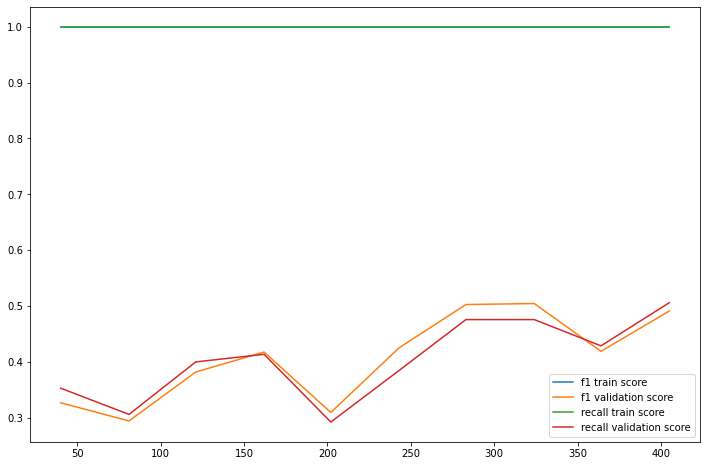

In [36]:
evaluation(model_1)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
val_score_recall=cross_val_score(model_1, X_train, y_train, cv=6, scoring='recall')

In [39]:
val_score_recall_mean=val_score_recall.mean()

In [40]:
val_score_recall_mean

0.5060606060606061